# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5



# Creating Trials
First, **preprocessing** of the provided dataset needs to occur prior to using the classifier pipeline.
We then split the dataset into a training and testing set. The **testing set** will be **stored**
away until the very end where it will be used to compare the best solutions found via Genetic Search.
Solutions will be compared in the form of **side-by-side plots**.
The **training set** will be **further split** into smaller trials that will be used to tune each generation
of algorithms during the Genetic Search algorithm.

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers

# Import/Create data
#X, y = make_moons(noise=0.3, random_state=10)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
dataset = helpers.generate_train_test_set(X, y)

# Split training data into trials
trials = helpers.generate_tuning_trials(dataset.training_set.X, dataset.training_set.y)

In [3]:
# Example run of the default Classifier on the generated trials
individual = Classifier()
data = individual.runAlgo(trials)
print(data)
print("The fitness score of the default classifier: ", ClassifierFitness().pipe(data).fitness)

data <see.base_classes.pipedata object at 0x7fa10f1277c0>
<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 1.58 s
The fitness score of the default classifier:  0.13333333333333333


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = trials
num_generations = 20
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=25, hof_size=num_generations)

In [6]:
# warnings may appear when this runs
population = my_evolver.run(ngen=num_generations)

Initializing a new random population
Generation 0/20 of population size 25
data <see.base_classes.pipedata object at 0x7fa10e4a6e50>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 727
	alpha = 0.0842
	max_depth = 562
	n_estimators = 580
	n_neighbors = 692

Time: 0.004 s
fitness=0.3333333333333333

data <see.base_classes.pipedata object at 0x7fa10e4a60d0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 247
	alpha = 0.2436
	max_depth = 528
	n_estimators = 561
	n_neighbors = 685

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.015 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4a63a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 743
	alpha = 0.9952
	max_depth = 430
	n_estimators = 252
	n_neighbors = 259

Time: 1.33 s
fitness=0.16666666666666666

data <see.base_classes.p

Time: 1.177 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e4aebe0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 979
	alpha = 0.7124
	max_depth = 994
	n_estimators = 613
	n_neighbors = 405

Time: 0.006 s
fitness=0.38333333333333336

data <see.base_classes.pipedata object at 0x7fa10e4ae5e0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 644
	alpha = 0.0219
	max_depth = 347
	n_estimators = 747
	n_neighbors = 38

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4a6520>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 114
	alpha = 0.207
	max_depth = 936
	n_estimators = 925
	n_neighbors = 340

Time: 0.003 s
fitness=0.3

data <see.base_classes.pipedata object at 0x7fa10e4a6940>
<class 'see.Workflo

Time: 1.253 s
fitness=0.13333333333333333

data <see.base_classes.pipedata object at 0x7fa10e4c1160>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 329
	alpha = 0.9495
	max_depth = 378
	n_estimators = 137
	n_neighbors = 127

Time: 1.123 s
fitness=0.2333333333333333

data <see.base_classes.pipedata object at 0x7fa10e497850>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 609
	alpha = 0.2051
	max_depth = 835
	n_estimators = 768
	n_neighbors = 566

Time: 1.256 s
fitness=0.16666666666666666

data <see.base_classes.pipedata object at 0x7fa10e497bb0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 739
	alpha = 0.9788
	max_depth = 172
	n_estimators = 525
	n_neighbors = 594

Time: 4.799 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e47d280>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 322
	alpha = 0.1155


Time: 3.272 s
fitness=0.2833333333333333

data <see.base_classes.pipedata object at 0x7fa10e4ae190>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 353
	alpha = 0.5039
	max_depth = 204
	n_estimators = 953
	n_neighbors = 643

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.008 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4aeee0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 177
	alpha = 0.9935
	max_depth = 920
	n_estimators = 367
	n_neighbors = 555

Time: 2.946 s
fitness=0.25

data <see.base_classes.pipedata object at 0x7fa10e4aed00>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 181
	alpha = 0.7446
	max_depth = 216
	n_estimators = 425
	n_neighbors = 140

Time: 0.004 s
fitness=0.35

data <see.base_classes.pipedata object at 0x7fa10e455580>
<class 'see.Workflow.workflow'> 

Time: 1.33 s
fitness=0.13333333333333333

data <see.base_classes.pipedata object at 0x7fa10e4d3430>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 695
	alpha = 0.9568
	max_depth = 1
	n_estimators = 832
	n_neighbors = 356

Time: 1.434 s
fitness=0.16666666666666666

data <see.base_classes.pipedata object at 0x7fa10e49aa00>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 924
	alpha = 0.2091
	max_depth = 232
	n_estimators = 519
	n_neighbors = 511

Time: 4.896 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e4559a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 898
	alpha = 0.3931
	max_depth = 90
	n_estimators = 340
	n_neighbors = 530

Time: 3.361 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e4a6f40>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 152
	alpha = 0.3176
	m

Time: 7.485 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e47deb0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 284
	alpha = 0.7952
	max_depth = 248
	n_estimators = 418
	n_neighbors = 554

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.007 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e47d220>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 472
	alpha = 0.8734
	max_depth = 77
	n_estimators = 684
	n_neighbors = 112

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.012 s
fitness=0.41666666666666663

data <see.base_classes.pipedata object at 0x7fa10e497ee0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 590
	alpha = 0.7449
	max_depth = 705
	n_estimators = 110
	n_neig

Time: 7.7 s
fitness=0.26666666666666666

data <see.base_classes.pipedata object at 0x7fa10e47b910>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 722
	alpha = 0.6869
	max_depth = 378
	n_estimators = 783
	n_neighbors = 443

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e47ba60>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 163
	alpha = 0.5631
	max_depth = 795
	n_estimators = 674
	n_neighbors = 645

Time: 5.923 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e47b790>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 176
	alpha = 0.5207
	max_depth = 384
	n_estimators = 688
	n_neighbors = 568

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL F

Time: 1.275 s
fitness=0.13333333333333333

#BEST [0.11666666666666665,  ['K Nearest Neighbors', 622, 0.3333, 84, 818, 769]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping 

Time: 1.512 s
fitness=0.18333333333333332

data <see.base_classes.pipedata object at 0x7fa10e5240a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 61
	alpha = 0.9439
	max_depth = 388
	n_estimators = 92
	n_neighbors = 284

Time: 1.39 s
fitness=0.15

data <see.base_classes.pipedata object at 0x7fa10e524760>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 296
	alpha = 0.8362
	max_depth = 378
	n_estimators = 379
	n_neighbors = 482

Time: 1.597 s
fitness=0.15

data <see.base_classes.pipedata object at 0x7fa10e4980d0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 687
	alpha = 0.5017
	max_depth = 781
	n_estimators = 269
	n_neighbors = 482

Time: 1.439 s
fitness=0.15

#BEST [0.11666666666666665,  ['K Nearest Neighbors', 83, 0.3333, 84, 818, 769]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping ov

Time: 1.444 s
fitness=0.14999999999999997

data <see.base_classes.pipedata object at 0x7fa10e461520>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 84
	n_estimators = 269
	n_neighbors = 769

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.014 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4613d0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 666
	alpha = 0.6554
	max_depth = 527
	n_estimators = 269
	n_neighbors = 620

Time: 1.284 s
fitness=0.15

data <see.base_classes.pipedata object at 0x7fa10e4a6cd0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 216
	alpha = 0.3241
	max_depth = 169
	n_estimators = 807
	n_neighbors = 259

Time: 1.484 s
fitness=0.16666666666666666

data <see.base_classes.pipedata object at 0x7fa10e4a6ac0>
<class 's

Time: 7.278 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e4b3eb0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 84
	n_estimators = 269
	n_neighbors = 769

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.013 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4b3040>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 29
	n_estimators = 818
	n_neighbors = 769

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.013 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10e49aee0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 84
	n_estimators = 269
	n_neighbors

Time: 10.074 s
fitness=0.2333333333333333

data <see.base_classes.pipedata object at 0x7fa10ef10670>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 84
	n_estimators = 269
	n_neighbors = 769

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.022 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10ef105e0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 29
	n_estimators = 818
	n_neighbors = 769

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.031 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10ef10760>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.3333
	max_depth = 84
	n_estimators = 818
	n_neighbors

Time: 3.094 s
fitness=0.26666666666666666

data <see.base_classes.pipedata object at 0x7fa10e459820>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 67
	alpha = 0.9054
	max_depth = 681
	n_estimators = 677
	n_neighbors = 863

Time: 0.006 s
fitness=0.3166666666666667

data <see.base_classes.pipedata object at 0x7fa10e459bb0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 111
	alpha = 0.069
	max_depth = 855
	n_estimators = 287
	n_neighbors = 974

Time: 1.387 s
fitness=0.16666666666666666

data <see.base_classes.pipedata object at 0x7fa10e4713d0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 741
	alpha = 0.65
	max_depth = 121
	n_estimators = 778
	n_neighbors = 953

Time: 6.728 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e471940>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 629
	alpha = 0.3333
	ma

Time: 6.058 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e481c40>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 94
	alpha = 0.4286
	max_depth = 277
	n_estimators = 418
	n_neighbors = 921

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e481d30>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 94
	alpha = 0.3936
	max_depth = 559
	n_estimators = 340
	n_neighbors = 223

Time: 0.004 s
fitness=0.33333333333333337

data <see.base_classes.pipedata object at 0x7fa10e496be0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 617
	alpha = 0.7189
	max_depth = 107
	n_estimators = 892
	n_neighbors = 318

Time: 0.003 s
fitness=0.31666666666666665

data <see.base_classes.pipedata object at 0x7fa10e496a00>
<cl

Time: 4.114 s
fitness=0.2333333333333333

data <see.base_classes.pipedata object at 0x7fa10ef09400>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 26
	alpha = 0.3042
	max_depth = 584
	n_estimators = 162
	n_neighbors = 668

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4dbee0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 359
	alpha = 0.4585
	max_depth = 744
	n_estimators = 435
	n_neighbors = 887

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.007 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4978e0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 65
	alpha = 0.5991
	max_depth = 231
	n_estimators = 646
	n_neigh

Time: 1.245 s
fitness=0.14999999999999997

data <see.base_classes.pipedata object at 0x7fa10e463a60>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 254
	alpha = 0.2252
	max_depth = 121
	n_estimators = 112
	n_neighbors = 750

Time: 0.004 s
fitness=0.31666666666666665

data <see.base_classes.pipedata object at 0x7fa10e463c10>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 666
	alpha = 0.1107
	max_depth = 341
	n_estimators = 639
	n_neighbors = 687

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.013 s
fitness=0.38333333333333336

data <see.base_classes.pipedata object at 0x7fa10e4a6a30>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 100
	alpha = 0.1338
	max_depth = 872
	n_estimators = 576
	n_neighbors = 899

Time: 0.004 s
fitness=0.35000000000000003

data <see.base_classes.pipedata object at 0x7fa10e497820>
<c

Time: 1.213 s
fitness=0.16666666666666666

data <see.base_classes.pipedata object at 0x7fa10e4911c0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 885
	alpha = 0.4233
	max_depth = 603
	n_estimators = 580
	n_neighbors = 365

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.008 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4cce20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 830
	alpha = 0.0046
	max_depth = 170
	n_estimators = 700
	n_neighbors = 8

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.013 s
fitness=0.33333333333333337

data <see.base_classes.pipedata object at 0x7fa10e4832b0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 989
	alpha = 0.2728
	max_depth = 298
	n_estimators = 282
	n_neigh

Time: 6.615 s
fitness=0.26666666666666666

data <see.base_classes.pipedata object at 0x7fa10e49a1f0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 120
	alpha = 0.8783
	max_depth = 189
	n_estimators = 457
	n_neighbors = 97

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.012 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10e49af70>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 627
	alpha = 0.1337
	max_depth = 555
	n_estimators = 361
	n_neighbors = 768

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e47d400>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 660
	alpha = 0.5122
	max_depth = 396
	n_estimators = 536
	n_neighbors

Time: 6.916 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e481310>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 193
	alpha = 0.1235
	max_depth = 293
	n_estimators = 371
	n_neighbors = 566

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.008 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e481e80>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 649
	alpha = 0.1716
	max_depth = 503
	n_estimators = 388
	n_neighbors = 76

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.01 s
fitness=0.5166666666666667

data <see.base_classes.pipedata object at 0x7fa10e49fa00>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 754
	alpha = 0.1194
	max_depth = 766
	n_estimators = 691
	n_neig

Time: 0.012 s
fitness=0.11666666666666665

data <see.base_classes.pipedata object at 0x7fa10e4810a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 629
	alpha = 0.3333
	max_depth = 84
	n_estimators = 774
	n_neighbors = 673

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.014 s
fitness=0.11666666666666665

#BEST [0.11666666666666665,  ['K Nearest Neighbors', 83, 0.6554, 84, 818, 769]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate

Time: 1.455 s
fitness=0.14999999999999997

data <see.base_classes.pipedata object at 0x7fa10e497850>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 264
	alpha = 0.5789
	max_depth = 422
	n_estimators = 763
	n_neighbors = 828

Time: 6.485 s
fitness=0.2333333333333333

data <see.base_classes.pipedata object at 0x7fa10e471340>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 979
	alpha = 0.8334
	max_depth = 486
	n_estimators = 937
	n_neighbors = 474

Time: 8.433 s
fitness=0.24999999999999994

data <see.base_classes.pipedata object at 0x7fa10e491b50>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 677
	alpha = 0.0972
	max_depth = 545
	n_estimators = 457
	n_neighbors = 82

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.21666666666666665

data <see.base_classes.pipedata object at 0x7fa10e49f490>
<cl

Time: 0.015 s
fitness=0.11666666666666665

#BEST [0.11666666666666665,  ['K Nearest Neighbors', 83, 0.6554, 84, 818, 769]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping o

In [7]:
print(my_evolver.hof[0].fitness.values[0]) # The best solution in each generation
print(my_evolver.best_avgs) # The fitness score of the best of each generation

%store my_evolver

0.11666666666666665
[0.26333333333333336, 0.23666666666666683, 0.21333333333333343, 0.2460000000000001, 0.2100000000000001, 0.22733333333333341, 0.20600000000000004, 0.20600000000000007, 0.21200000000000008, 0.2113333333333333, 0.19600000000000006, 0.21533333333333318, 0.20266666666666652, 0.19466666666666654, 0.19333333333333322, 0.19599999999999987, 0.19799999999999987, 0.22933333333333317, 0.20399999999999985, 0.1846666666666666, 0.17599999999999993]


## Final Comparison
We compare the found solutions using the testing set that was set aside at the very beginning.
We also train the classifiers using the training set that was made at the very beginning.

*TODO*: I'm not sure if it is correct to retrain the classifiers using the entire training
set. There might be issues with overfitting...

*TODO*: The plots below work nicely because we have two dimension data. Think about what to
do when the feature space is multidimensional.

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


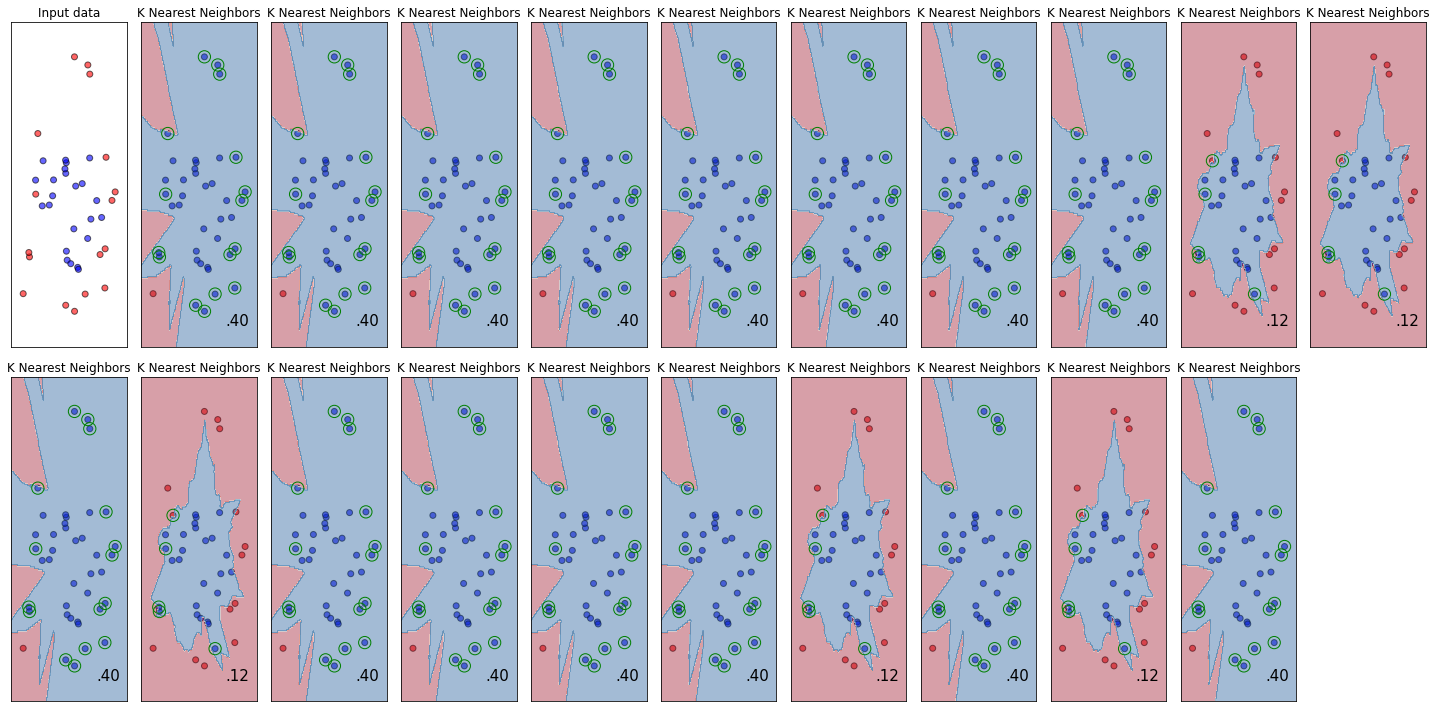

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# Use stored away testing set and the entire training set for final comparisons
training_set = dataset.training_set
testing_set = dataset.testing_set

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Create Mesh Grid
h = 0.02
x_min, x_max = testing_set.X[:, 0].min() - .5, testing_set.X[:, 0].max() + .5
y_min, y_max = testing_set.X[:, 1].min() - .5, testing_set.X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)

# Plot the training points and testing points (Input data)
#ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
#           edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for i, ind in enumerate(solution_set):
    # Initialize classifier
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)

    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    score = ClassifierFitness().evaluate(predictions, testing_set.y)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    # Draw Contour/Color Plot
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.

    contour_set = pipedata()
    contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.evaluate(training_set, contour_set)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]
    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

In [9]:
my_evolver.hof[0]
print(my_evolver.hof)

[['K Nearest Neighbors', 83, 0.6554, 84, 818, 769], ['K Nearest Neighbors', 622, 0.2096, 29, 818, 769], ['K Nearest Neighbors', 83, 0.2096, 84, 269, 769], ['K Nearest Neighbors', 83, 0.3333, 29, 774, 769], ['K Nearest Neighbors', 622, 0.2096, 84, 818, 769], ['K Nearest Neighbors', 83, 0.6554, 29, 818, 769], ['K Nearest Neighbors', 622, 0.6554, 84, 818, 769], ['K Nearest Neighbors', 83, 0.2096, 29, 818, 769], ['K Nearest Neighbors', 629, 0.3333, 84, 774, 673], ['K Nearest Neighbors', 83, 0.3333, 29, 774, 673], ['K Nearest Neighbors', 629, 0.2096, 84, 818, 769], ['K Nearest Neighbors', 629, 0.3333, 84, 818, 673], ['K Nearest Neighbors', 83, 0.2096, 84, 774, 769], ['K Nearest Neighbors', 83, 0.3333, 29, 269, 769], ['K Nearest Neighbors', 83, 0.3333, 84, 269, 769], ['K Nearest Neighbors', 83, 0.3333, 29, 818, 769], ['K Nearest Neighbors', 629, 0.2096, 84, 774, 673], ['K Nearest Neighbors', 83, 0.3333, 84, 818, 769], ['K Nearest Neighbors', 629, 0.2096, 29, 774, 673], ['K Nearest Neighbors'

In [10]:
my_evolver.hof[0].fitness.values[0]

0.11666666666666665

# Comparing Genetic Search and final test

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


([<matplotlib.axis.XTick at 0x7fa1092612b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

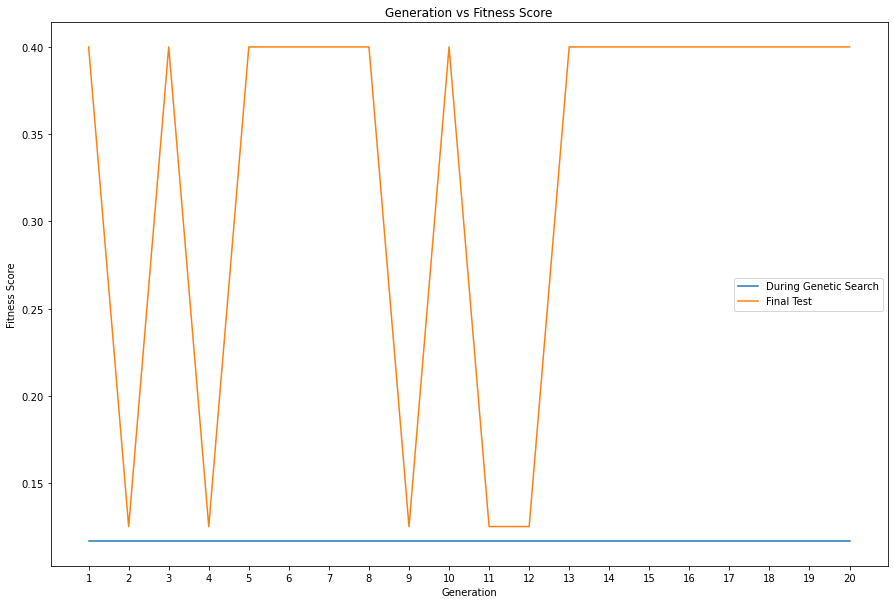

In [26]:
import matplotlib.pyplot as plt

# The following plot shows:
# 1) The fitness scores of the best individual of each generation during Genetic Search
# 2) The fitness scores of the best individual of each generation when tested on the unseen testing set

solution_set = my_evolver.hof

x = range(1, num_generations + 1)
#x = range(num_generations, 0, -1)

# Extract fitness scores during Genetic Search
y_1 = list(map(lambda ind: ind.fitness.values[0], solution_set))

def score_clf(algo_vector, testing_set):
    algo_name = algo_vector[0]
    param_list = algo_vector
    targets = testing_set.y
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)
    return ClassifierFitness().evaluate(predictions, targets)
    
y_2 = list(map(lambda ind: score_clf(ind, testing_set), solution_set))

figure = plt.figure(figsize=(15, 10))
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['During Genetic Search', 'Final Test'])
plt.title('Generation vs Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.xticks(x)